<a href="https://colab.research.google.com/github/KalyaniTBhandwalkar/Assignment/blob/main/Vaccine_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install transformers

In [ ]:
pip install scikit-multilearn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from transformers import pipeline
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.preprocessing import LabelEncoder
#from skmultilearn.problem_transform import BinaryRelevance
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


## Preliminary analysis & Data Processing





## Read Dataset

In [ ]:
df=pd.read_csv("/content/features.csv")
df1=pd.read_csv("/content/labels.csv")

In [ ]:
df.shape

(26707, 36)

In [ ]:
df1.shape

(26707, 3)

## Joining the both dataframes into a single dataframe

In [ ]:
df['h1n1_vaccine']=df1['h1n1_vaccine']
df['seasonal_vaccine']=df1['seasonal_vaccine']

In [ ]:
df.shape

(26707, 38)

In [ ]:
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


## Checking missing values

In [ ]:
pd. set_option('display.max_columns', None) # or 1000.
pd. set_option('display.max_rows', None) # or 1000
null_values = df.isnull().sum()
print(null_values)

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

# Categorical Features are encoded using Label Encodings

In [ ]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
label_encoder1 = preprocessing.LabelEncoder()
label_encoder2 = preprocessing.LabelEncoder()
label_encoder3 = preprocessing.LabelEncoder()
label_encoder4 = preprocessing.LabelEncoder()
label_encoder5 = preprocessing.LabelEncoder()
label_encoder6 = preprocessing.LabelEncoder()
label_encoder7 = preprocessing.LabelEncoder()
label_encoder8 = preprocessing.LabelEncoder()
label_encoder9 = preprocessing.LabelEncoder()
label_encoder10 = preprocessing.LabelEncoder()
label_encoder11 = preprocessing.LabelEncoder()

# Encode labels in column .
df['age_group']= label_encoder.fit_transform(df['age_group'])
df['education']= label_encoder1.fit_transform(df['education'])
df['race']= label_encoder2.fit_transform(df['race'])
df['sex']= label_encoder3.fit_transform(df['sex'])
df['income_poverty']= label_encoder4.fit_transform(df['income_poverty'])
df['marital_status']= label_encoder5.fit_transform(df['marital_status'])
df['rent_or_own']= label_encoder6.fit_transform(df['rent_or_own'])
df['employment_status']= label_encoder7.fit_transform(df['employment_status'])
df['hhs_geo_region']= label_encoder8.fit_transform(df['hhs_geo_region'])
df['census_msa']= label_encoder9.fit_transform(df['census_msa'])
df['employment_industry']= label_encoder10.fit_transform(df['employment_industry'])
df['employment_occupation']= label_encoder11.fit_transform(df['employment_occupation'])


## Fill NA values with 0

In [ ]:
df=df.fillna(value=0)


# Convert all datatypes into integer

In [ ]:
df = df.astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   respondent_id                26707 non-null  int64
 1   h1n1_concern                 26707 non-null  int64
 2   h1n1_knowledge               26707 non-null  int64
 3   behavioral_antiviral_meds    26707 non-null  int64
 4   behavioral_avoidance         26707 non-null  int64
 5   behavioral_face_mask         26707 non-null  int64
 6   behavioral_wash_hands        26707 non-null  int64
 7   behavioral_large_gatherings  26707 non-null  int64
 8   behavioral_outside_home      26707 non-null  int64
 9   behavioral_touch_face        26707 non-null  int64
 10  doctor_recc_h1n1             26707 non-null  int64
 11  doctor_recc_seasonal         26707 non-null  int64
 12  chronic_med_condition        26707 non-null  int64
 13  child_under_6_months         26707 non-null  i

In [ ]:
pd.crosstab(
    df["h1n1_vaccine"], 
    df["seasonal_vaccine"], 
    margins=True,
    normalize=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


#Exploratory Data Analysis

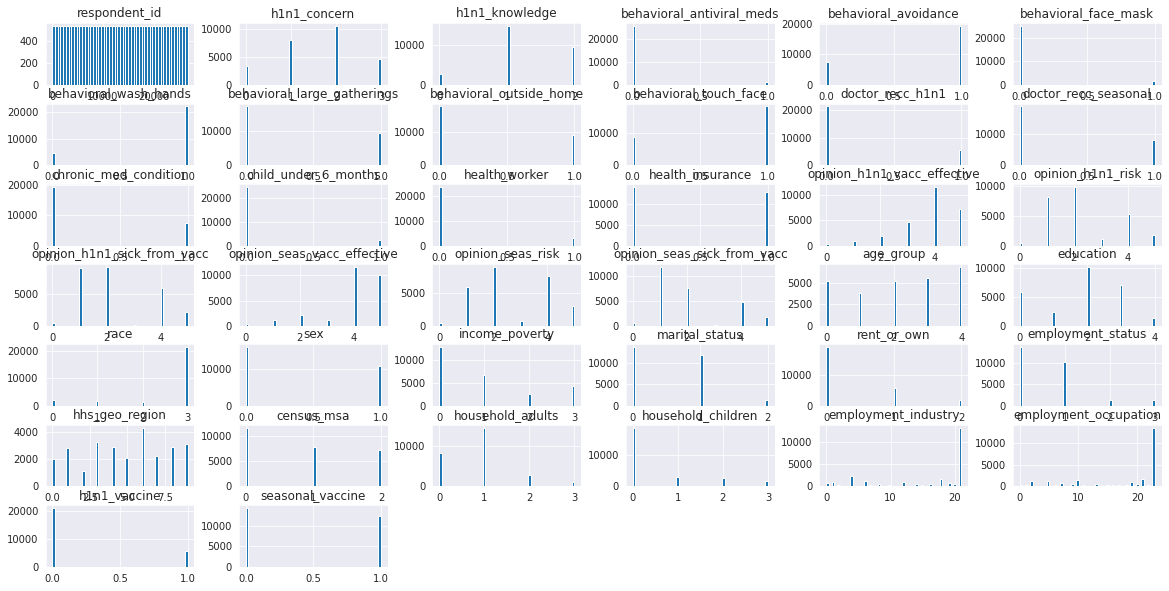

In [ ]:
df.hist(figsize=(20,10),bins=50)
plt.show()

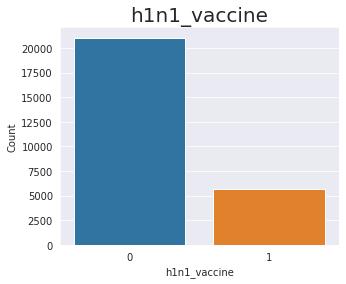

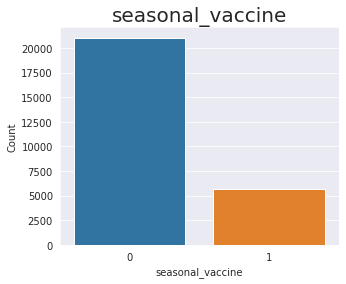

In [ ]:
vcc  = df.h1n1_vaccine.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(5,4))
sns.barplot(x=vcc.index, y=vcc.values)
plt.title('h1n1_vaccine', fontsize = 20)
plt.xlabel('h1n1_vaccine')
plt.ylabel('Count')
plt.show()

vcc2  = df.seasonal_vaccine.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(5,4))
sns.barplot(x=vcc2.index, y=vcc.values)
plt.title('seasonal_vaccine', fontsize = 20)
plt.xlabel('seasonal_vaccine')
plt.ylabel('Count')
plt.show()

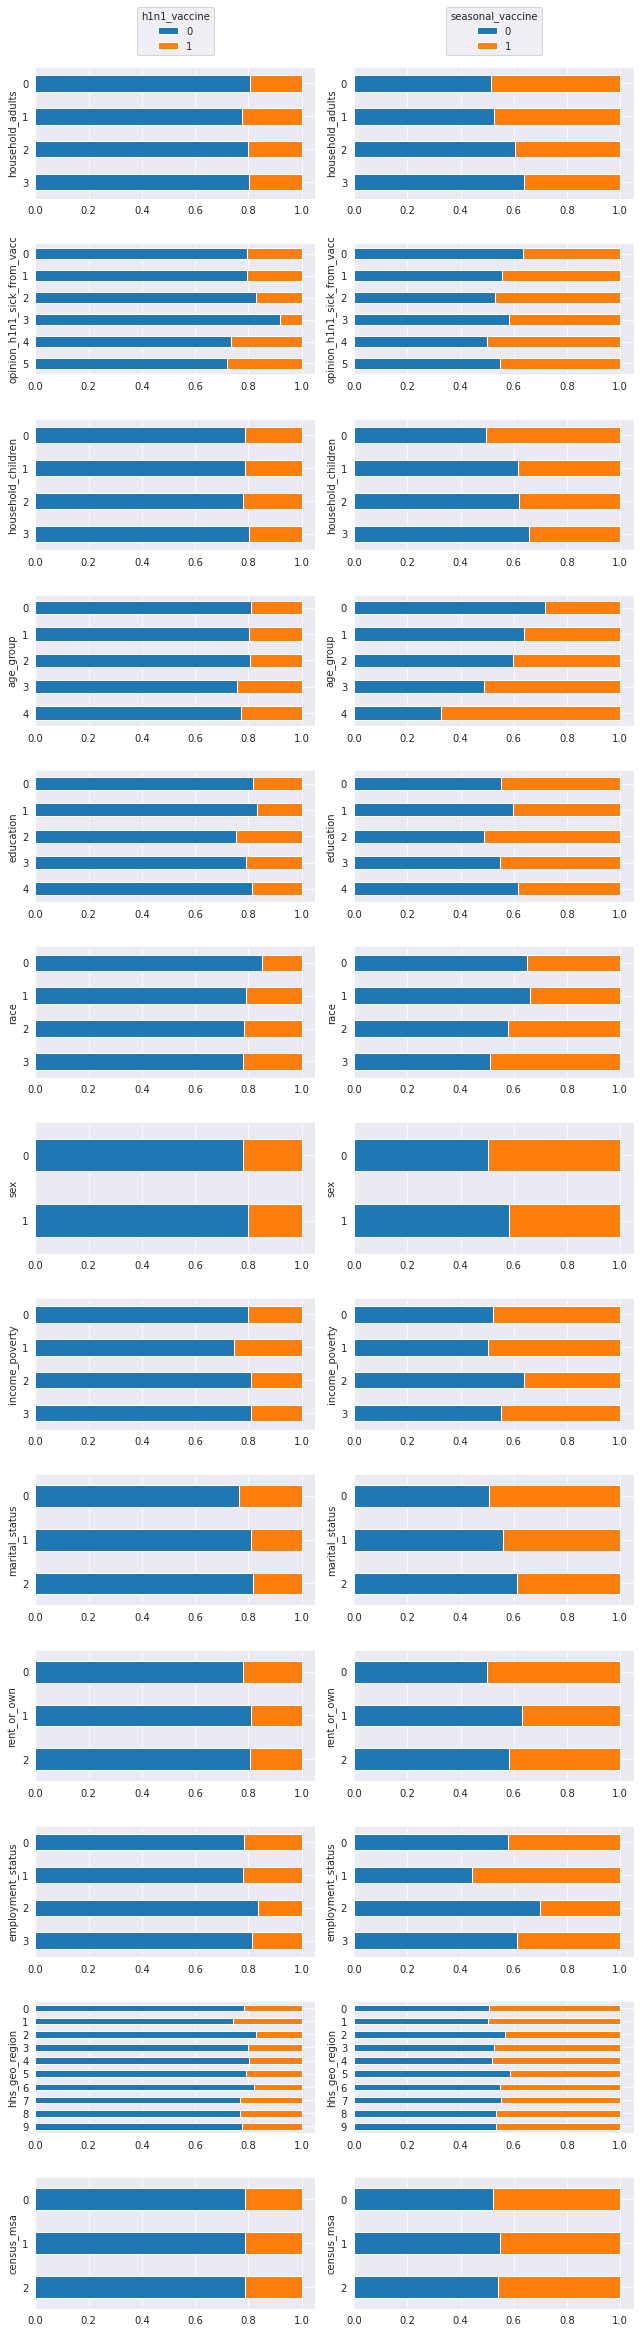

In [ ]:
def vaccination_rate_plot(col, target, df, ax=None):
   
    counts = (df[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

cols_to_plot = [
     'household_adults','opinion_h1n1_sick_from_vacc',
       'household_children', 'age_group', 'education', 'race',
       'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa'
       
]

fig, ax = plt.subplots(
    len(cols_to_plot), 2, figsize=(9,len(cols_to_plot)*2.5)
)
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(
        col, 'h1n1_vaccine', df, ax=ax[idx, 0]
    )
    vaccination_rate_plot(
        col, 'seasonal_vaccine', df, ax=ax[idx, 1]
    )
    
ax[0, 0].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='h1n1_vaccine'
)
ax[0, 1].legend(
    loc='lower center', bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine'
)
fig.tight_layout()


In [ ]:
pd.crosstab(
    df["h1n1_vaccine"], 
    df["seasonal_vaccine"], 
    margins=True,
    normalize=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


## Plotting Correlation Maps

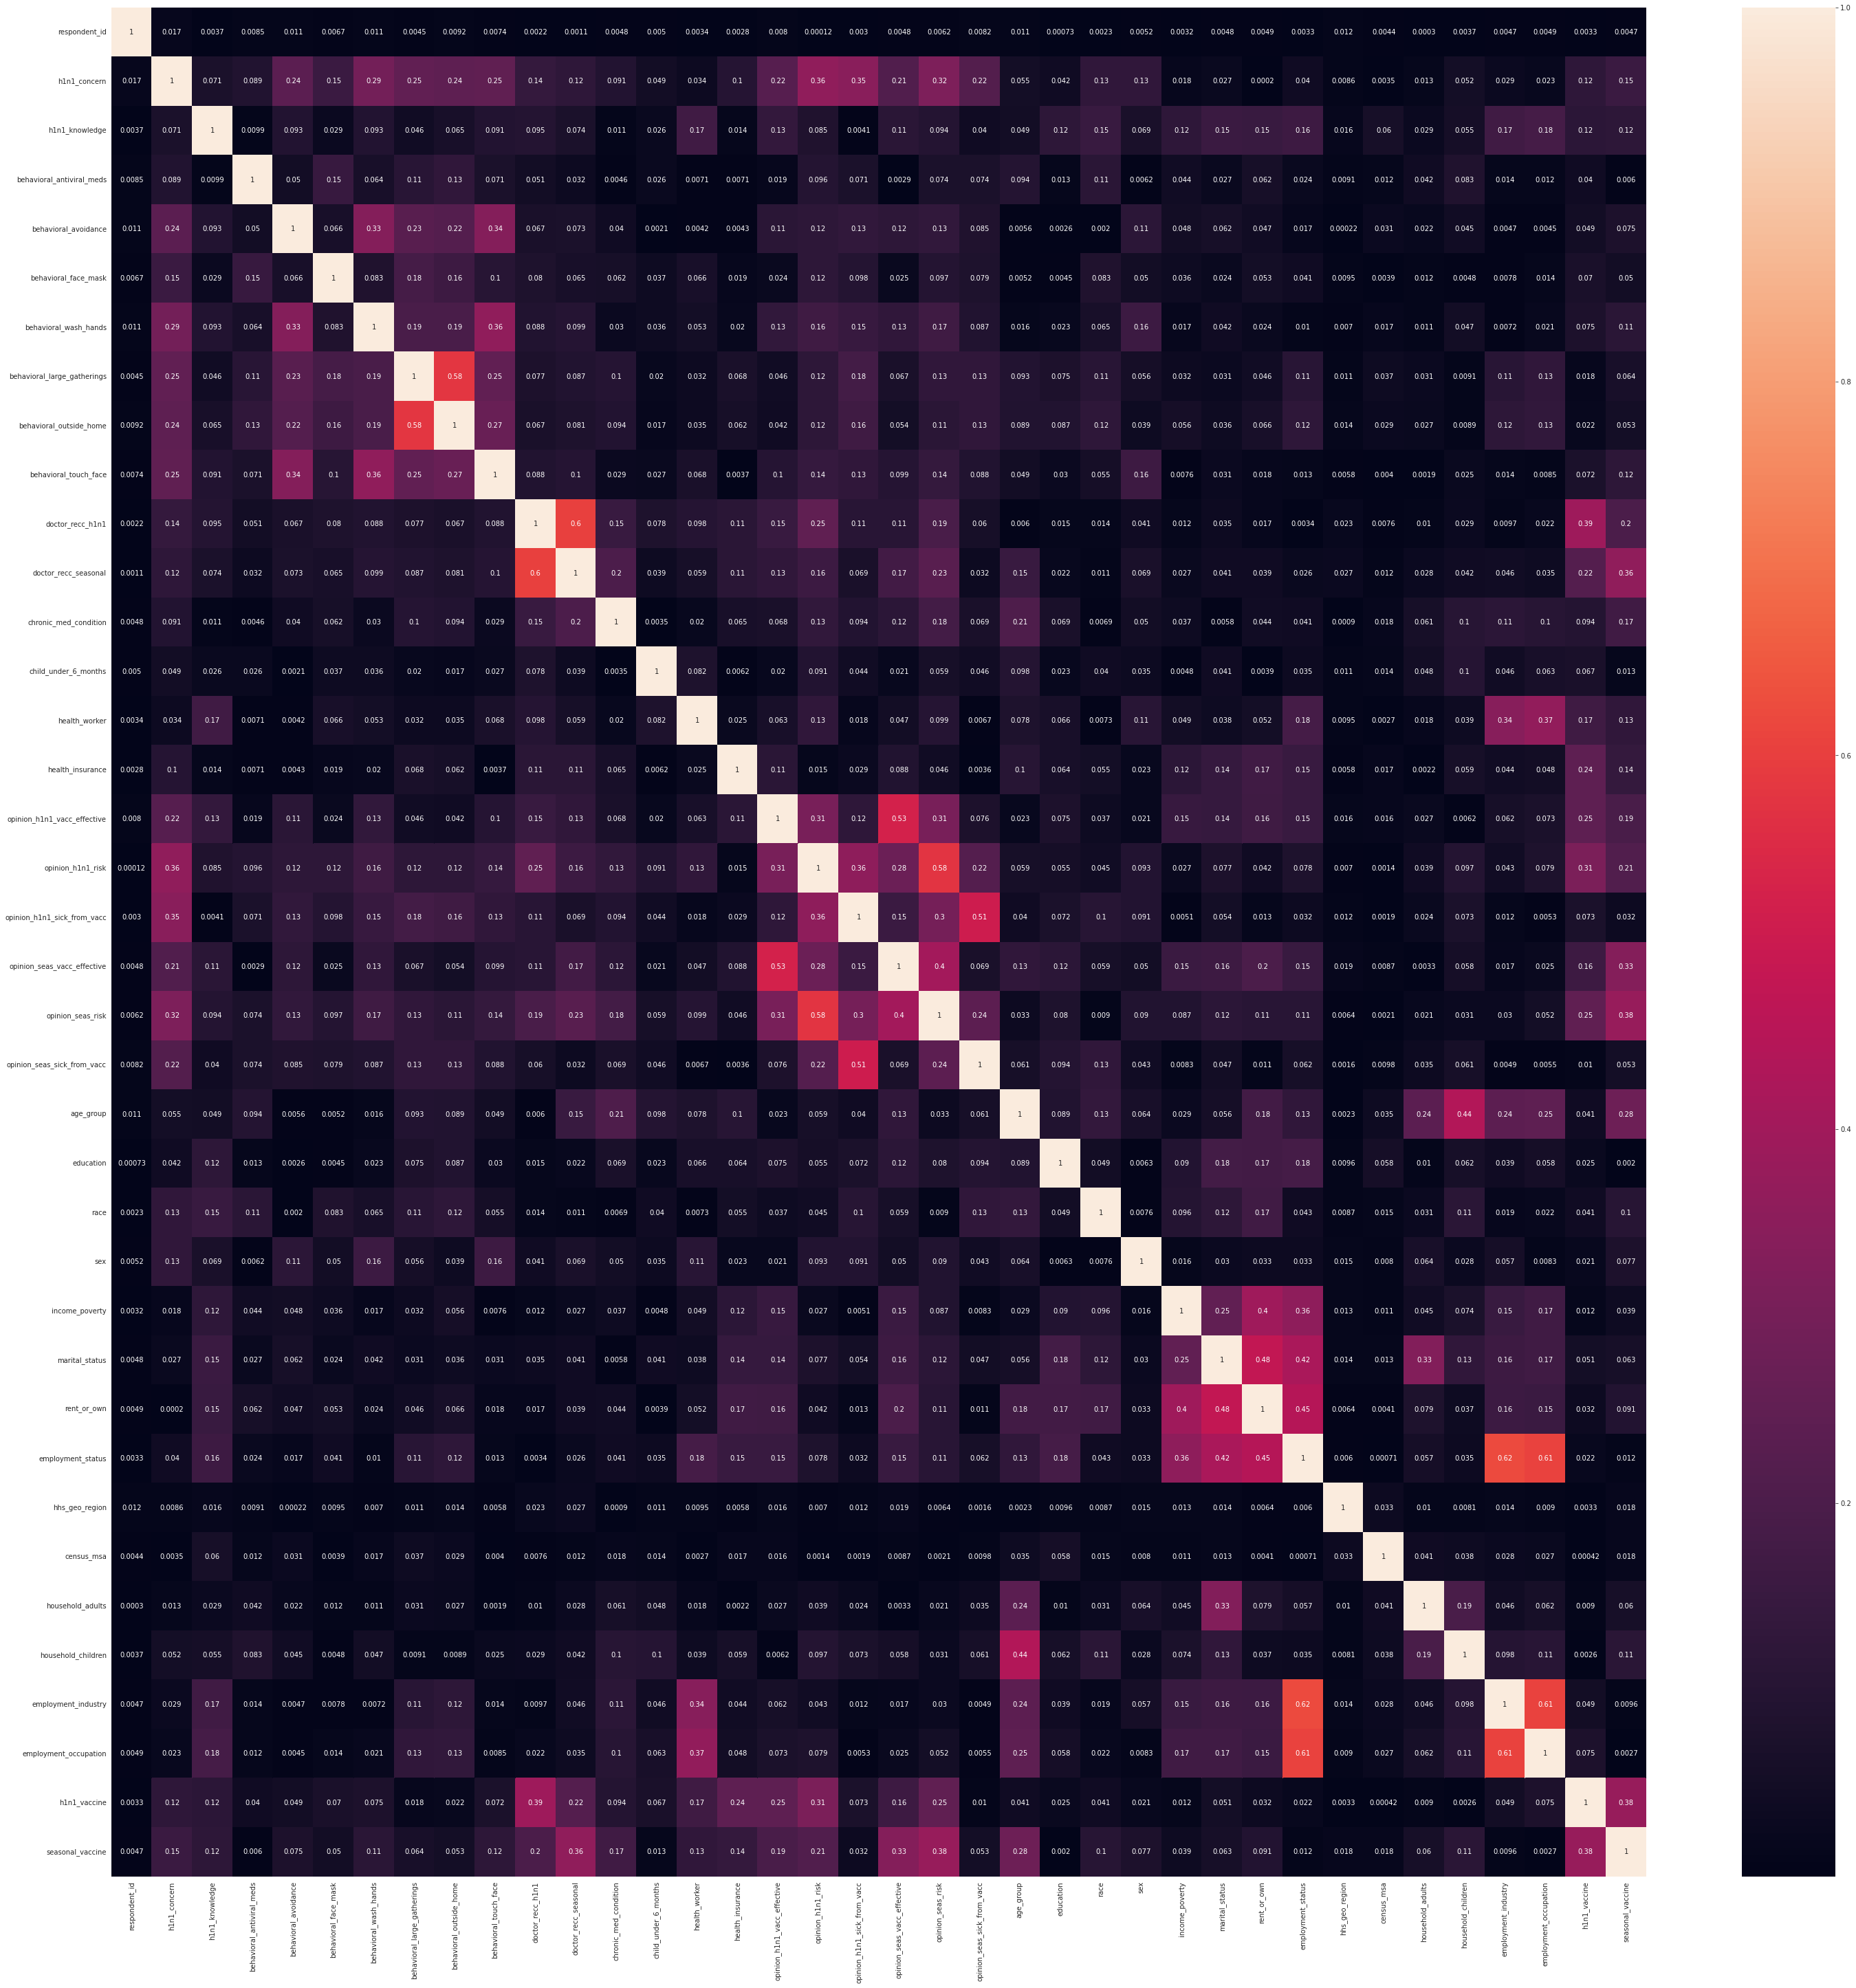

In [ ]:
corr_matrix = df.corr().abs()
plt.figure(figsize=(50,50))
ax = sns.heatmap(corr_matrix,annot=True)

## Data Splitting and Test data processing 

In [ ]:
#X=df.drop(['h1n1_vaccine','seasonal_vaccine'],axis=1)
X=df.iloc[:,:-2]
y= df.iloc[:, -2:]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state= 15,shuffle=True)


In [ ]:

X_train.head(2)



,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
17593,17593,3,2,0,0,0,1,0,0,1,1,1,0,0,1,1,5,2,1,5,2,1,1,2,3,1,1,0,0,0,7,0,1,2,4,2
10233,10233,1,2,0,1,0,1,0,0,1,0,0,0,0,0,1,1,1,4,2,1,4,2,2,3,0,3,0,0,1,7,1,1,1,21,23


In [ ]:
y_test.head()

,h1n1_vaccine,seasonal_vaccine
20767,0,0
1183,0,0
4501,0,0
5089,0,0
3671,0,0


## Standardize features

In [ ]:
#Standardize features

scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
scaler

MinMaxScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.mean(axis=0)

array([0.49732465, 0.53877838, 0.62728762, 0.04886497, 0.71954131,
       0.06941259, 0.82504095, 0.35974725, 0.33695296, 0.67470161,
       0.20149778, 0.30301896, 0.27161245, 0.07863328, 0.10751229,
       0.47334425, 0.75849286, 0.46201732, 0.46472268, 0.79177159,
       0.5345846 , 0.41511818, 0.5466417 , 0.4601919 , 0.85454404,
       0.40688041, 0.31713862, 0.27259537, 0.1889539 , 0.21943989,
       0.53436305, 0.41572666, 0.29301818, 0.17745534, 0.72683851,
       0.75414076])

In [ ]:
X_train.std(axis=0)

array([0.2883053 , 0.30469964, 0.31123673, 0.21558567, 0.44922335,
       0.25415445, 0.37993207, 0.47992621, 0.47266866, 0.46848623,
       0.40111896, 0.45956335, 0.44479111, 0.26916554, 0.30976345,
       0.49928897, 0.2203917 , 0.26068256, 0.27626792, 0.2389729 ,
       0.28388131, 0.2707382 , 0.36463399, 0.29692576, 0.31010193,
       0.49125222, 0.37077053, 0.29804768, 0.31222034, 0.27272292,
       0.31266201, 0.41151321, 0.25146917, 0.30978419, 0.35308083,
       0.32571668])

## KNeighborsClassifier

In [ ]:

X, y = make_multilabel_classification(n_classes=2, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
knn = make_pipeline(MinMaxScaler(), MultiOutputClassifier(KNeighborsClassifier(n_neighbors=4)))
knn.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('KNN', MultiOutputClassifier(KNeighborsClassifier(n_neighbors=4)))])
print("-------------------------------")
print(" KNeighborsClassifier ")
s1=knn.score(X_train, y_train)*100
print("train score=",s1)
s11=knn.score(X_test, y_test)*100
print("test score=",s11 )
pred_prob1 = knn.predict_proba(X_test)



-------------------------------
 KNeighborsClassifier 
train score= 85.33333333333334
test score= 88.0


## LogisticRegression

In [ ]:
LR = make_pipeline(MinMaxScaler(), MultiOutputClassifier(LogisticRegression( multi_class='ovr', random_state=10)))
LR.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('LogisticRegression', MultiOutputClassifier(LogisticRegression(multi_class='ovr',  random_state=10)))])
print("-------------------------------")
print(" LogisticRegression ")
s2=LR.score(X_train, y_train)*100
print("train score=",s2)
s22=LR.score(X_test, y_test)*100
print("test score=", s22 )
pred_prob2 = LR.predict(X_test)


-------------------------------
 LogisticRegression 
train score= 80.0
test score= 80.0


## DecisionTreeClassifier

In [ ]:

DT = make_pipeline(MinMaxScaler(), MultiOutputClassifier(DecisionTreeClassifier(criterion='entropy', random_state=90)))
DT.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('DecisionTreeClassifier', MultiOutputClassifier(DecisionTreeClassifier( random_state=1)))])
print("-------------------------------")
print(" DecisionTreeClassifier ")
s3=DT.score(X_train, y_train)*100
print("train score=",s3)
s33=DT.score(X_test, y_test)*100
print("test score=",s33)
pred_prob3 = DT.predict(X_test)
print(classification_report(y_test,pred_prob3))

-------------------------------
 DecisionTreeClassifier 
train score= 100.0
test score= 68.0
              precision    recall  f1-score   support

           0       0.95      0.78      0.86        23
           1       0.78      0.78      0.78         9

   micro avg       0.89      0.78      0.83        32
   macro avg       0.86      0.78      0.82        32
weighted avg       0.90      0.78      0.83        32
 samples avg       0.88      0.76      0.80        32



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## RandomForestClassifier

In [ ]:
RF = make_pipeline(MinMaxScaler(), MultiOutputClassifier(RandomForestClassifier( criterion='gini', random_state=10)))
RF.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('RandomForest', MultiOutputClassifier(RandomForestClassifier(n_estimators=10, random_state=1)))])
print("-------------------------------")
print(" RandomForest ")
s4=RF.score(X_train, y_train)*100
print("train score=",s4)
s44=RF.score(X_test, y_test)*100
print("test score=",s44 )
pred_prob4 = RF.predict(X_test)
print(classification_report(y_test,pred_prob4))
y_pred_prob=RF.predict_proba(X_test)
#prob1=y_pred_prob[:,0]
#prob2=y_pred_prob[:,1]
#fpr1, tpr1, thresh1 = roc_curve(y_test, prob1, pos_label=1)
#fpr2, tpr2, thresh2 = roc_curve(y_test, y_pred_prob[:1], pos_label=1)




-------------------------------
 RandomForest 
train score= 100.0
test score= 92.0
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.89      0.94         9

   micro avg       0.97      0.97      0.97        32
   macro avg       0.98      0.94      0.96        32
weighted avg       0.97      0.97      0.97        32
 samples avg       0.92      0.90      0.91        32



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


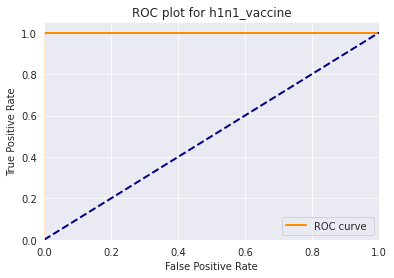

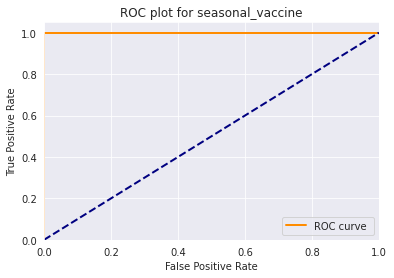

In [ ]:




label_names = ["h1n1_vaccine", "seasonal_vaccine"]
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection
for i in [0,1]:
  y_binary = y_test[:,i]
  #print("y_binary\n", y_binary)
  y_binary_scores = y_test[:,i]
  #print("y_binary_scores\n", y_binary_scores)
  from sklearn.metrics import roc_curve

  fpr, tpr, thresholds = roc_curve(y_binary, y_binary_scores)
  #print("selected label {}\nfpr {} \ntpr {} \nthresholds {}".format(label_names[1], fpr, tpr, thresholds))
  import matplotlib.pyplot as plt
  plt.figure()
  lw = 2
  plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve ' )
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC plot for {}'.format(label_names[i]))
  plt.legend(loc="lower right")
plt.show()



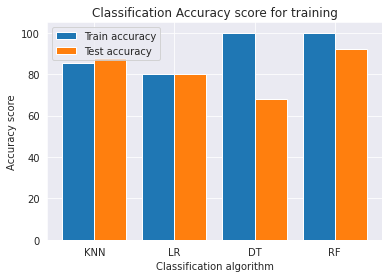

In [ ]:
label_names = ['KNN', 'LR', 'DT', 'RF']
acc = np.arange(len(label_names))
train = [s1,s2,s3,s4]
test=[s11,s22,s33,s44]

plt.bar(acc-0.2, train,0.4, align='center',label="Train accuracy")
plt.bar(acc+0.2, test,0.4, align='center',label="Test accuracy")
plt.xticks(acc, label_names)
plt.xlabel('Classification algorithm')
plt.ylabel('Accuracy score')
plt.title('Classification Accuracy score for training')
plt.legend()

plt.show()